In [49]:
import keras,os

In [50]:
from keras.models import Sequential

In [51]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [52]:
from keras.preprocessing.image import ImageDataGenerator

In [53]:
import numpy as np

In [54]:
trdata=ImageDataGenerator() #object of imagedatagenerator 

In [55]:
traindata=trdata.flow_from_directory(directory='C:/Users/devic/Desktop/CNN/training_set', target_size=(224,224))

Found 8005 images belonging to 2 classes.


In [56]:
tsdata=ImageDataGenerator() #object of imagedatagenerator 

In [57]:
testdata=tsdata.flow_from_directory(directory='C:/Users/devic/Desktop/CNN/test_set', target_size=(224,224))

Found 2023 images belonging to 2 classes.


In [58]:
#VGG

In [59]:
VGG=keras.applications.VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [60]:
VGG.trainable=False 

In [61]:
model=keras.Sequential([
    VGG,
    keras.layers.Flatten(),
   
    keras.layers.Dense(units=1024, activation="relu"),
 
    keras.layers.Dense(units=512, activation="relu"),
    
    keras.layers.Dense(units=2, activation="sigmoid")
])

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 40,931,650
Trainable params: 26,216,962
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
#import tensorflow as tf
#tf.random.set_seed(100)

In [65]:
hist=model.fit_generator(steps_per_epoch=10, generator=traindata, validation_data=testdata, validation_steps=10, epochs=10)

Epoch 1/10
10/10 [==============================] - 116s 12s/step - loss: 0.4907 - accuracy: 0.9594 - val_loss: 0.8386 - val_accuracy: 0.9312
Epoch 2/10
10/10 [==============================] - 122s 12s/step - loss: 0.3863 - accuracy: 0.9688 - val_loss: 0.4061 - val_accuracy: 0.9750
Epoch 3/10
10/10 [==============================] - 117s 12s/step - loss: 0.3495 - accuracy: 0.9750 - val_loss: 0.4405 - val_accuracy: 0.9656
Epoch 4/10
10/10 [==============================] - 120s 12s/step - loss: 0.2450 - accuracy: 0.9781 - val_loss: 0.1746 - val_accuracy: 0.9625
Epoch 5/10
10/10 [==============================] - 114s 11s/step - loss: 0.2654 - accuracy: 0.9693 - val_loss: 0.3777 - val_accuracy: 0.9531
Epoch 6/10
10/10 [==============================] - 121s 12s/step - loss: 0.1297 - accuracy: 0.9812 - val_loss: 0.4505 - val_accuracy: 0.9531
Epoch 7/10
10/10 [==============================] - 116s 12s/step - loss: 0.2764 - accuracy: 0.9719 - val_loss: 0.6575 - val_accuracy: 0.9344
Epoch 

In [66]:
model.save('vggclf.h5')

In [67]:
import matplotlib.pyplot as plt

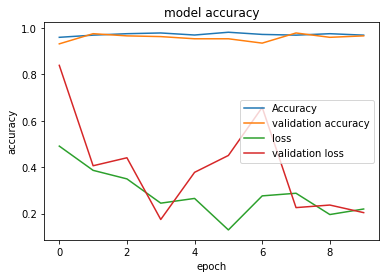

In [68]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['Accuracy','validation accuracy','loss','validation loss'])
plt.show()

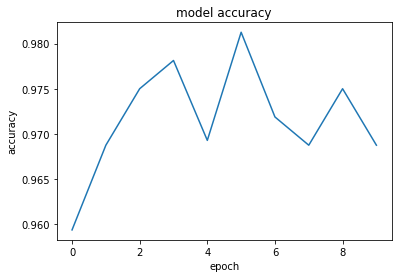

In [69]:
plt.plot(hist.history["accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [70]:
from keras.preprocessing import image 

In [71]:
img=image.load_img("C:/Users/devic/Desktop/CNN/dog_or_cat2.jpg", target_size=(224,224))

In [72]:
img=np.asarray(img)

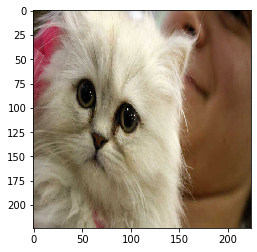

In [73]:
plt.imshow(img)

In [74]:
img=np.expand_dims(img, axis=0)


In [75]:
from keras.models import load_model
saved_model=load_model("vggclf.h5")
output=saved_model.predict(img)
if output[0][0]>output[0][1]:
    print("cat")
else:
    print("dog")

cat


In [41]:
#Visualization 

In [76]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [77]:
# load the model
model = VGG
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img("C:/Users/devic/Desktop/CNN/dog_or_cat2.jpg", target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________


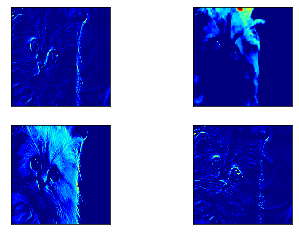

In [78]:
# plot all 64 maps in an 2x2 squares
square = 2
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='jet')
        ix += 1
# show the figure
pyplot.show()